In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

fund_id = np.random.randint(1000, 9999, 20)
fund_type = np.random.choice(['Equity', 'Bond', 'Hybrid'], 20)
expense_ratio = np.random.uniform(0.01, 0.1, 20)
return_rate = np.random.normal(0.1, 0.05, 20)
asset_allocation = np.random.choice(['Domestic', 'International', 'Both'], 20)
fund_manager_experience = np.random.randint(1, 21, 20)
target_variable = np.random.choice(['High', 'Medium', 'Low'], 20)

df = pd.DataFrame({
    'fund_id': fund_id,
    'fund_type': fund_type,
    'expense_ratio': expense_ratio,
    'return_rate': return_rate,
    'asset_allocation': asset_allocation,
    'fund_manager_experience': fund_manager_experience,
    'target_variable': target_variable
})


In [ ]:
print(df)


    fund_id  expense_ratio  return_rate  fund_manager_experience  \
0      3289       1.000000     0.363590                 0.941176   
1      7086       0.000000     0.572080                 0.764706   
2      4937       0.376363     0.441599                 1.000000   
3      8427       0.467662     0.825031                 0.235294   
4      2128       0.329100     0.344527                 0.000000   
5      2662       0.157942     0.617115                 0.294118   
6      8294       0.276855     0.000000                 0.764706   
7      7477       0.822734     0.880122                 0.294118   
8      3654       0.593783     0.930193                 0.470588   
9      8793       0.964959     0.195231                 0.294118   
10     5610       0.379317     1.000000                 0.117647   
11     1672       0.872853     0.319806                 0.823529   
12     5050       0.766400     0.696264                 0.294118   
13     3999       0.119414     0.621833         

In [ ]:

df.isnull().sum()

df = pd.get_dummies(df, columns=['fund_type', 'asset_allocation', 'target_variable'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['expense_ratio', 'return_rate', 'fund_manager_experience']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()


,fund_id,expense_ratio,return_rate,fund_manager_experience,fund_type_Bond,fund_type_Equity,fund_type_Hybrid,asset_allocation_Both,asset_allocation_Domestic,asset_allocation_International,target_variable_High,target_variable_Low,target_variable_Medium
0,6845,0.461077,0.000000,0.277778,True,False,False,True,False,False,False,True,False
1,5104,0.267325,0.501793,0.611111,False,False,True,False,True,False,True,False,False
2,8958,0.984379,0.471066,0.500000,False,True,False,True,False,False,True,False,False
3,6550,0.305258,0.525080,0.833333,False,False,True,True,False,False,False,True,False
4,2118,0.958932,0.216369,0.777778,False,True,False,False,False,True,False,True,False


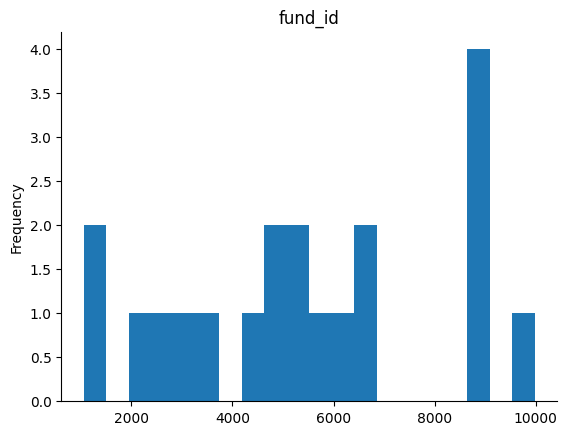

In [ ]:

df['fund_id'].plot(kind='hist', bins=20, title='fund_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['target_variable'] = df['return_rate'].apply(lambda x: 'High' if x > 0.1 else ('Medium' if 0.05 < x < 0.1 else 'Low'))
print(df)

    fund_id  expense_ratio  return_rate  fund_manager_experience  \
0      6845       0.461077     0.000000                 0.277778   
1      5104       0.267325     0.501793                 0.611111   
2      8958       0.984379     0.471066                 0.500000   
3      6550       0.305258     0.525080                 0.833333   
4      2118       0.958932     0.216369                 0.777778   
5      5985       0.007790     0.914610                 1.000000   
6      9980       0.736489     0.397636                 0.944444   
7      8894       0.491400     0.431942                 0.055556   
8      3255       0.447847     0.251836                 0.444444   
9      1060       0.000000     0.243993                 0.222222   
10     4866       0.004787     0.170167                 0.222222   
11     3495       0.325463     0.380061                 0.833333   
12     9036       1.000000     0.237267                 0.666667   
13     5501       0.638273     1.000000         

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target_variable', axis=1)
y = df['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (16, 13)
y_train shape: (16,)
X_test shape: (4, 13)
y_test shape: (4,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

#  model performance
print('Random Forest accuracy:', rf_model.score(X_test, y_test))
print('SVM accuracy:', svm_model.score(X_test, y_test))
print('Naive Bayes accuracy:', nb_model.score(X_test, y_test))
print('Decision Tree accuracy:', dt_model.score(X_test, y_test))

Random Forest accuracy: 0.75
SVM accuracy: 0.75
Naive Bayes accuracy: 0.75
Decision Tree accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test))
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

# Precision
rf_precision = precision_score(y_test, rf_model.predict(X_test), average='weighted')
svm_precision = precision_score(y_test, svm_model.predict(X_test), average='weighted')
nb_precision = precision_score(y_test, nb_model.predict(X_test), average='weighted')
dt_precision = precision_score(y_test, dt_model.predict(X_test), average='weighted')

# Recall
rf_recall = recall_score(y_test, rf_model.predict(X_test), average='weighted')
svm_recall = recall_score(y_test, svm_model.predict(X_test), average='weighted')
nb_recall = recall_score(y_test, nb_model.predict(X_test), average='weighted')
dt_recall = recall_score(y_test, dt_model.predict(X_test), average='weighted')

# F1-score
rf_f1_score = f1_score(y_test, rf_model.predict(X_test), average='weighted')
svm_f1_score = f1_score(y_test, svm_model.predict(X_test), average='weighted')
nb_f1_score = f1_score(y_test, nb_model.predict(X_test), average='weighted')
dt_f1_score = f1_score(y_test, dt_model.predict(X_test), average='weighted')

# Print the results
print('Model\tAccuracy\tPrecision\tRecall\tF1-score')
print(f'RF\t{rf_accuracy:.4f}\t{rf_precision:.4f}\t{rf_recall:.4f}\t{rf_f1_score:.4f}')
print(f'SVM\t{svm_accuracy:.4f}\t{svm_precision:.4f}\t{svm_recall:.4f}\t{svm_f1_score:.4f}')
print(f'NB\t{nb_accuracy:.4f}\t{nb_precision:.4f}\t{nb_recall:.4f}\t{nb_f1_score:.4f}')
print(f'DT\t{dt_accuracy:.4f}\t{dt_precision:.4f}\t{dt_recall:.4f}\t{dt_f1_score:.4f}')


Model	Accuracy	Precision	Recall	F1-score
RF	0.7500	0.5625	0.7500	0.6429
SVM	0.7500	0.5625	0.7500	0.6429
NB	0.7500	0.5625	0.7500	0.6429
DT	1.0000	1.0000	1.0000	1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
